#  Random Walk 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from mh_random_walk import MHRandomWalk

First of all, let's find the probability of reaching position r in the n'th step, P{$s_n$ = r}.

In [11]:
def s_experimental(n, r, p=0.5, N=1000):
    """
    Computes the probability of a random walk reaching a given position `r` after `n` steps,
    starting from the origin, with a probability `p` of moving to the right at each step.
    The probability is estimated by performing `N` independent random walks and counting
    the fraction of them that reach `r`.

    Parameters:
    -----------
    n : int
        The number of steps in the random walk.
    r : int
        The target position to reach.
    p : float, optional
        The probability of moving to the right at each step. Default is 0.5.
    N : int, optional
        The number of independent random walks to perform. Default is 1000.

    Returns:
    --------
    float
        The estimated probability of reaching `r` after `n` steps.
    """
    mhrs = [MHRandomWalk(p=p, N=n) for i in range(N)]
    s_arr = np.array([mhr.s[n] for mhr in mhrs])
    return np.sum(s_arr == r) / N

In [12]:
def s_analytical(n, r, p=0.5):
    """
    Computes the probability of a random walk reaching a given position `r` after `n` steps,
    starting from the origin, with a probability `p` of moving to the right at each step.
    The probability is computed analytically.

    Parameters:
    -----------
    n : int
        The number of steps in the random walk.
    r : int
        The target position to reach.
    p : float, optional
        The probability of moving to the right at each step. Default is 0.5.

    Returns:
    --------
    float
        The probability of reaching `r` after `n` steps.
    """
    if r % 2 != n % 2:
        return 0
    else:
        return math.comb(n, (n+r)//2) * p**((n+r)//2) * (1-p)**((n-r)//2)

Now, let's gain a better insight into p($s_n$ = r).

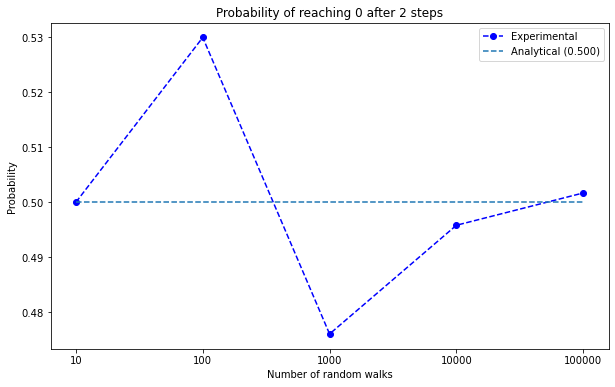

In [18]:
n, r = 2, 0
p = 0.5
Ns = [10, 100, 1000, 10000, 100000]
s_experimental_arr = np.array([s_experimental(n, r, p=p, N=N) for N in Ns])
prob = s_analytical(n, r, p=p)

plt.figure(figsize=(10, 6))
plt.plot(range(len(Ns)), s_experimental_arr, 'b--o', label='Experimental')
plt.plot(range(len(Ns)), [prob]*len(Ns), '--', label=f'Analytical ({prob:.3f})')
plt.xticks(range(len(Ns)), Ns)
plt.xlabel('Number of random walks')
plt.ylabel('Probability')
plt.title(f'Probability of reaching {r} after {n} steps')
plt.legend()
plt.show()


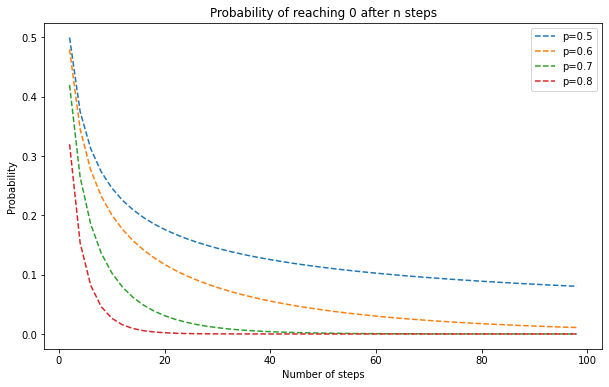

In [24]:
ps = [0.5, 0.6, 0.7, 0.8]
ns = list(range(2, 100, 2))
r = 0
probs = [[s_analytical(n, r, p=p) for n in ns] for p in ps]

plt.figure(figsize=(10, 6))
[plt.plot(ns, probs[i], '--', label=f'p={ps[i]}') for i in range(len(ps))]
plt.xlabel('Number of steps')
plt.ylabel('Probability')
plt.title(f'Probability of reaching {r} after n steps')
plt.legend()
plt.show()